### **1.Consumo di alcol per paese** 
Esegui un’**analisi esplorativa** focalizzata sul **consumo di alcol**.  
Analizza i seguenti aspetti:
* Visualizza i primi 10 paesi ordinati per total_litres_of_pure_alcohol (dal più alto)

* Calcola la media del consumo di birra, vino, e distillati

* Crea una nuova colonna alcohol_index che sia: `(beer_servings + wine_servings + spirit_servings) / 3`

* Trova il paese con il valore massimo di alcohol_index

* Filtra solo i paesi che consumano più di 100 birre all’anno

Crea un bar chart dei 10 paesi con più consumo totale (total_litres_of_pure_alcohol)

Crea un line plot con wine_servings ordinato per paese (usa sort_values)

<Axes: xlabel='wine_servings'>

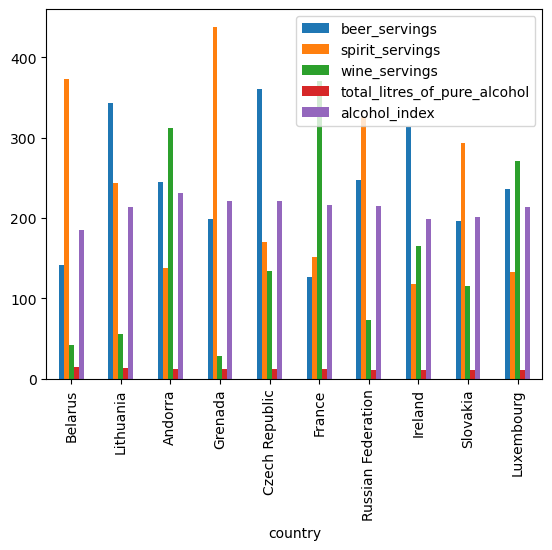

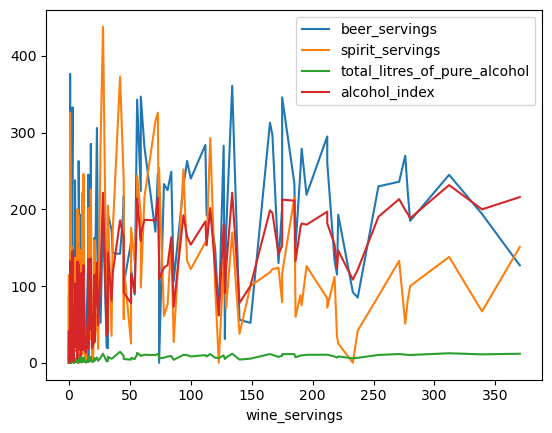

In [74]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/alcohol-consumption/drinks.csv")
df.info
df.sort_values(by="total_litres_of_pure_alcohol", ascending=False) #1
#mean_values = df[['beer_servings', 'spirit_servings', 'wine_servings']].mean()
#mean_values
df['alcohol_index'] = df[['beer_servings', 'wine_servings', 'spirit_servings']].sum(axis=1) / 3
(df.sort_values(by='alcohol_index',ascending=False, inplace=False)).head(1)
df[df["beer_servings"]>100]
df = df.set_index('country')
(df.sort_values(by="total_litres_of_pure_alcohol",ascending=False).head(10)).plot(kind='bar')
df=df.set_index('wine_servings')
(df.sort_values(by='wine_servings',ascending=False)).plot(kind='line')

### **2.Analisi offerte di lavoro** 

Esegui un’**analisi esplorativa** focalizzata sui **lavori nel campo dei dati in ciascun paese**.  
Analizza i seguenti aspetti per ogni paese:

* Lo **stipendio medio annuale** (`salary_year_avg`)
* Il **numero totale di offerte di lavoro** (job count)
* L’intervallo degli stipendi: **valore minimo e massimo** (`min` / `max`)

Rappresenta graficamente lo stipendio medio (`salary_year_avg`) per `job_title_short` usando un grafico a barre orizzontali. Ordina i dati dallo stipendio più alto al più basso. Includi un titolo e le etichette per gli assi x e y.

salary range is 15000.0 - 960000.0


<Axes: title={'center': 'Average Salary by Job Title'}, xlabel='job_title_short'>

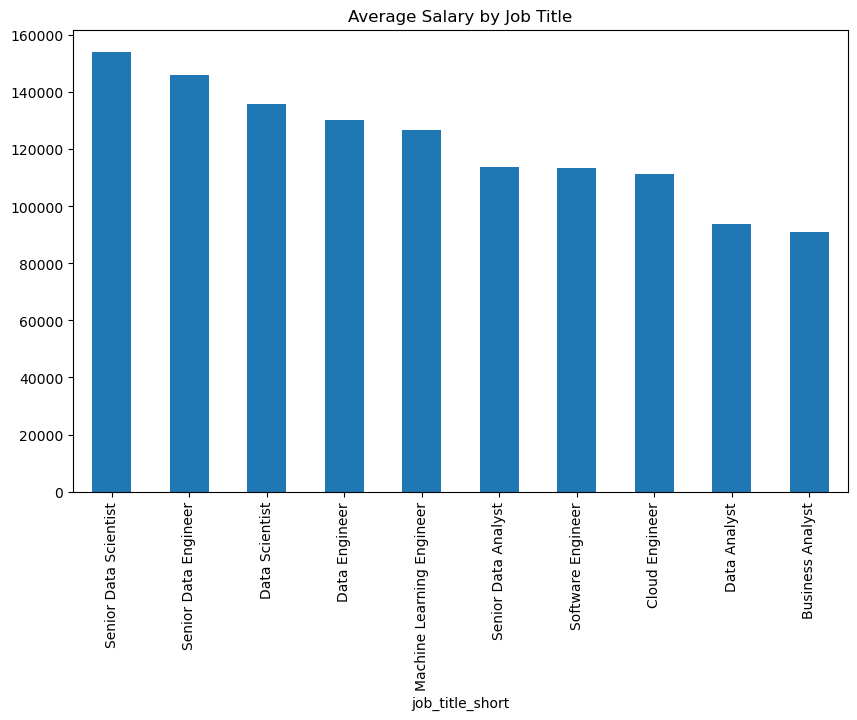

In [1]:
import pandas as pd
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
salarylocation = df.groupby('search_location')['salary_year_avg'].agg(['mean', 'count'])
salarylocation = salarylocation.sort_values('mean', ascending=False)

salarylocation['mean'] = salarylocation['mean'].round(2)
salarylocation['mean']
job_count=(df.count())
job_count
print("salary range is",df['salary_year_avg'].min(),"-",df['salary_year_avg'].max())
df.set_index('job_title_short')
# Group by 'job_title_short' and calculate the mean salary for plotting
salarytitle = df.groupby('job_title_short')['salary_year_avg'].mean().sort_values(ascending=False)
salarytitle.plot(kind='bar', title='Average Salary by Job Title', figsize=(10, 6))